# Initialize

In [62]:
]status

    Status `C:\Users\liaog\.julia\environments\v1.3\Project.toml`
  [6e4b80f9] BenchmarkTools v0.5.0
  [8f4d0f93] Conda v1.4.1
  [d38c429a] Contour v0.5.2
  [0c46a032] DifferentialEquations v6.13.0
  [61744808] DynamicalSystems v1.4.0
  [c87230d0] FFMPEG v0.3.0
  [f6369f11] ForwardDiff v0.10.10
  [f67ccb44] HDF5 v0.13.1
  [7073ff75] IJulia v1.21.2
  [c601a237] Interact v0.10.3
  [d3863d7c] InteractBase v0.10.3
  [d1acc4aa] IntervalArithmetic v0.16.1
  [d2bf35a9] IntervalRootFinding v0.5.2
  [4138dd39] JLD v0.9.2
  [b964fa9f] LaTeXStrings v1.1.0
  [dd61e66b] MDBM v0.1.4
  [2774e3e8] NLsolve v4.3.0
  [09606e27] ODEInterfaceDiffEq v3.6.0
  [1dea7af3] OrdinaryDiffEq v5.34.1
  [91a5bcdd] Plots v1.0.11
  [d330b81b] PyPlot v2.9.0
  [90137ffa] StaticArrays v0.12.1
  [d6d074c3] VideoIO v0.6.7
  [0f1e0344] WebIO v0.8.13
  [8ba89e20] Distributed 
  [37e2e46d] LinearAlgebra 


In [ ]:
]build GR

In [ ]:
]build WebIO

In [1]:
using Plots
using DifferentialEquations
using Interact
using JLD
using LinearAlgebra
#using ForwardDiff

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2416119523531618209\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5747489947238716929\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2416119523531618209\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1273


In [2]:
#using DynamicalSystems
#using Plots
#%% define the system
function Heav(x)
    if x>0
        return 1
    elseif x<0
        return 0
    else
        return 0.5
    end
end

function C_kuramoto(du,u,p,t)
    x,x1,x2 = u
    w,w1,w2,k1,α1 = p
    # Rescale the system
    du[1] = w
    du[2] = w1 + k1.*Heav(sin(x)).*sin(x-x1)
    du[3] = w2 + α1.*sin(x1-x2)
end

function C_kuramoto_L(du,u,p,t)
    x,x1,x2 = u
    w,w1,w2,k1,α1 = p
    # Rescale the system
    du[1] = w
    du[2] = w1 + k1.*Heav(sin(x))*(x-x1)
    du[3] = w2 + α1.*sin(x1-x2)
end

C_kuramoto_L (generic function with 1 method)

# Using DS package.

In [ ]:
#%% See result
using DynamicalSystems

u0 = [0,0,pi]
p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.08]
C_kura = ContinuousDynamicalSystem(C_kuramoto,u0,p0)
tr = trajectory(C_kura,300,dt = .1)
trmod = zeros(length(tr[:,1]),3)
trmod[:,1] = tr[:,1] .% (2*pi)
trmod[:,2] = tr[:,2] .% (2*pi)
trmod[:,3] = tr[:,3] .% (2*pi)

p1 = plot(0:.1:300,trmod)
#p2 = plot(0:.1:300,tr)
#plot(p1,p2)

In [ ]:
function mapPi(x,y)
    plane = (3, 3*pi)
    psos = poincaresos(C_kura,plane,60.0;u0 = [x, y, pi])
    xn = psos[1,1] #% (2*pi)
    yn = psos[1,2] #% (2*pi)
    return [xn, yn]
end

In [ ]:
#mapPi(4.7,3.5) .% (2*pi)
#repeat(y, 1, length(x))

In [ ]:
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
PI = zeros(length(x),length(y),2)
for i = 1:length(x), j = 1:length(y)
    X = mapPi(x[i],y[j])
    PI[i,j,:] = X
end

In [ ]:
#Plots.pyplot()
gr()
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
p1 = plot(x,y,PI[:,:,1],xlabel="x",ylabel="y", st=:surface,camera=(45,45))
#p1 = plot!(p1,x,y,X,st=:surface)
p1 = plot!(p1,x,y,X.+2*pi,st=:surface,c=:blue)
p2 = plot(x,y,PI[:,:,2],xlabel="x",ylabel="y", st=:surface,camera=(45,45))
#p2 = plot!(p2,x,y,Y,st=:surface)
p2 = plot!(p2,x,y,Y.+2*pi,st=:surface,c=:blues)
plot(p1,p2)

In [ ]:
gr()
#Plots.scalefontsizes(2)
p11 = plot(x,y,PI[:,:,1]'-X.-2*pi,xlabel="x",ylabel="y",aspect_ratio=:equal,c=:lightrainbow,
            fill=true,size=(800,600),xlims=(0,2*pi),ylims=(0,2*pi))
#savefig(p11, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\pi1_008.png")

In [ ]:
p22 = plot(x,y,PI[:,:,2]'-Y.-2*pi,xlabel="x",ylabel="y",aspect_ratio=:equal,c=:lightrainbow,
            fill=true,size=(800,600),xlims=(0,2*pi),ylims=(0,2*pi))
#savefig(p22, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\pi2_008.png")

In [ ]:
#savefig(p11, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\pi1_008.png")
#savefig(p22, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\pi2_008.png")

In [ ]:

#Plots.contour(x,y,PI[:,:,2]-Y,levels=0)
gr()
q1 = contour(x,y,PI[:,:,1]'-X.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:blue)
#q2 = contour(x,y,PI[:,:,2]'-Y.-2*pi,levels=[0,0],xlabel="x",ylabel="y")
q3 = contour!(q1, x,y,PI[:,:,2]'-Y.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:red,aspect_ratio=:equal,
                xlims = (0,2*pi),
                ylims = (0,2*pi),colorbar = :none)
annotate!(4.7,3.5,"A")
annotate!(5.5,3.5,"B")
annotate!(0.66,5.7,"C")
q4 = annotate!(1.5,5.7,"D",size=(800,600))
#savefig(q4, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\Kura_fps008.png")

In [ ]:
gr()
qq1 = contour(x,y,PI[:,:,1]'-X.-2*pi,fill=true,aspect_ratio=:equal,c=:heat,size=(800,600),xlims=(0,2*pi),ylims=(0,2*pi))
qq2 = contour(x,y,PI[:,:,2]'-Y.-2*pi,fill=true,aspect_ratio=:equal,c=:heat,size=(800,600),xlims=(0,2*pi),ylims=(0,2*pi))
plot(qq1,qq2)

# Using DE package

In [67]:
# function θ1(x,y,t,ω,ω1,k)
#     A = sqrt(Complex((ω-ω1)^2-k^2))
#     return x + ω*t -2*atan((A*tan(0.5*A*t - atan((k+(ω1-ω)*tan((x-y)/2))/A) + k))/(ω-ω1))
# end
function θ1L(x,y,t,ω,ω1,k)
    return y + ω1*t + k*sin(x-y)*t + 0.5*k*t^2*cos(x-y)*(-ω+ω1+k*sin(x-y))
end

θ1L (generic function with 2 methods)

In [71]:
# θ1(1,1,24,pi/12,2*pi/29,0.12)
θ1L(1,1,2,pi/12,2*pi/29,0.12)
# sqrt(0.12^2-(pi/12-2*pi/29)^2)

1.422490046517248

In [19]:
using DifferentialEquations
function condition(u,t,integrator)
    u[3] - 3*pi
end
function affect!(integrator)
    integrator.u[3] = pi
    push!(tt, integrator.t)    # save the event time
end
tt = Float64[]
cevent = ContinuousCallback(condition,affect!,nothing)
u0 = [0.,0.,pi]
p0 = [pi/12,2*pi/29,2*pi/29,0.12,0.1]  # w,w1,w2,k1,α1
tspan = (0.0,24.0*10)
prob = ODEProblem(C_kuramoto,u0,tspan,p0)
# prob = ODEProblem(C_kuramoto_L,u0,tspan,p0)
sol = solve(prob,AutoTsit5(Rosenbrock23()),callback=cevent,dtmax=0.05)
# plot(sol)
sol(tt)

t: 9-element Array{Float64,1}:
  37.433330036014695
  64.16981942074845 
  88.47733528443021 
 112.53162241917342 
 136.54230759744217 
 160.54341824207026 
 184.54453873701442 
 208.54490140327633 
 232.54494412471567 
u: 9-element Array{Array{Float64,1},1}:
 [9.800022886712204, 9.252405868379075, 9.424777960769378]  
 [16.79961943953429, 16.082060294897865, 9.424777960769378] 
 [23.16331221156382, 22.42040824361771, 9.424777960769376]  
 [29.460709857384085, 28.712898167625262, 9.424777960769376]
 [35.74669253769288, 34.9979639994281, 9.424777960769374]   
 [42.03016861095562, 41.28081118424189, 9.42477796076937]   
 [48.31364726302508, 47.564140390608735, 9.424777960769378] 
 [54.59692751600947, 53.847419442508425, 9.424777960769376] 
 [60.88012400763518, 60.13063009117752, 9.424777960769376]  

In [ ]:
# test backward
tspan = (0.0,-24.0*10)
prob = ODEProblem(C_kuramoto,u0,tspan,p0)
sol = solve(prob,AutoTsit5(Rosenbrock23()))

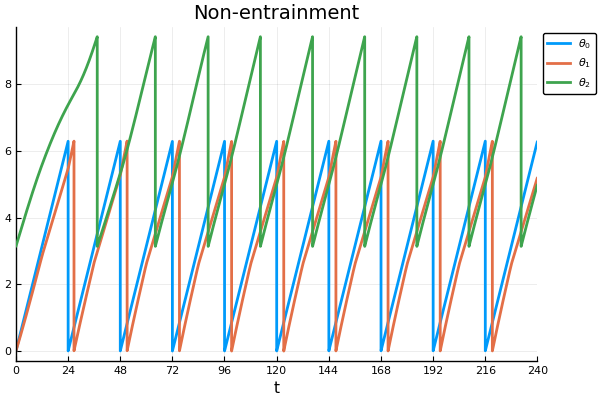

In [20]:
using LaTeXStrings
pyplot()
sol1 = sol
sol1[1,:] = sol1[1,:] .% (2*pi)
sol1[2,:] = sol1[2,:] .% (2*pi);
plot(sol1,label=[L"θ_0" L"θ_1" L"θ_2"], lw=2, xticks= 0:24:240, title = "Non-entrainment", legend = :outertopright)
# sol(tt).u .% (2*pi)

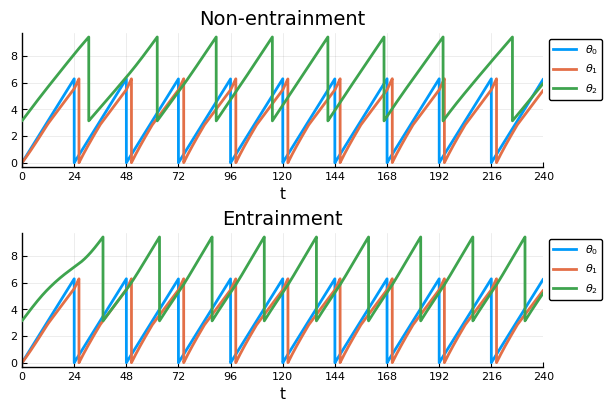

In [86]:
## Produce paper time course figure.
p0 = [pi/12,2*pi/29,2*pi/29,0.2,0.03]  # w,w1,w2,k1,α1
prob = ODEProblem(C_kuramoto,u0,tspan,p0)
sol_unentrain = solve(prob,AutoTsit5(Rosenbrock23()),callback=cevent,dtmax=0.05)

p0 = [pi/12,2*pi/29,2*pi/29,0.2,0.1]  # w,w1,w2,k1,α1
prob = ODEProblem(C_kuramoto,u0,tspan,p0)
sol_entrain = solve(prob,AutoTsit5(Rosenbrock23()),callback=cevent,dtmax=0.05)

sol_unentrain[1,:] = sol_unentrain[1,:] .% (2*pi)
sol_unentrain[2,:] = sol_unentrain[2,:] .% (2*pi);

sol_entrain[1,:] = sol_entrain[1,:] .% (2*pi)
sol_entrain[2,:] = sol_entrain[2,:] .% (2*pi);

using LaTeXStrings
pyplot()
tcourse1 = plot(sol_unentrain,label=[L"θ_0" L"θ_1" L"θ_2"], lw=2, xticks= 0:24:240, title = "Non-entrainment", legend = :outertopright)
tcourse2 = plot(sol_entrain,label=[L"θ_0" L"θ_1" L"θ_2"], lw=2, xticks= 0:24:240, title = "Entrainment", legend = :outertopright)
tcourse = plot(tcourse1,tcourse2,layout=(2,1))

# savefig(tcourse, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\tcourse_20200519.png")

In [ ]:
# The whole movie of the trajectory
x = sol[1,:]
y = sol[2,:]
z = sol[3,:]

using Plots
plt = plot(cos.(x),sin.(x), xlims=(-1,1),ylims=(-1,1),aspect_ratio=:equal,lab="")
scatter!(1,lab="")
scatter!(2,lab="")
#scatter!(3,lab="")
anim = @animate for i=1:10:length(x)-1
    plt[2] = cos.(x[i]),sin.(x[i])
    plt[3] = cos.(y[i]),sin.(y[i])
    end
gif(anim,"C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\anim1.gif", fps = 15)

#gif(anim, "/anim_fps15.gif", fps = 15)
#gif(anim, "/tmp/anim_fps30.gif", fps = 30)
#plot(cos.(sol[1,:]),sin.(sol[1,:]),seriestype=:scatter,aspect_ratio=:equal)

In [ ]:
# The trajectories.
#x = sol(tt)[1,:]
#y = sol(tt)[2,:]
x = sol[1,:]
y = sol[2,:]
z = sol[3,:]
xs = 0:0.1:3*π

@manipulate for i=1:10:length(x)-1    
    plot(cos.(xs),sin.(xs), xlims=(-1.1,1.1),ylims=(-1.1,1.1),aspect_ratio=:equal)
    scatter!((cos.(x[i]),sin.(x[i])))
    scatter!((cos.(y[i]),sin.(y[i])))
    scatter!((cos.(z[i]),sin.(z[i])))
    end

In [ ]:
# The iterates of the map.
x = sol(tt)[1,:]
y = sol(tt)[2,:]

xs = 0:0.1:3*π

@manipulate for i=1:1:length(x)-1    
    plot(cos.(xs),sin.(xs), xlims=(-1.1,1.1),ylims=(-1.1,1.1),aspect_ratio=:equal)
    scatter!((cos.(x[i]),sin.(x[i])))
    scatter!((cos.(y[i]),sin.(y[i])))
    end

## Build the map for all.

In [3]:
# using ODEInterfaceDiffEq

function Entrainment_map(x,y,p0)
    condition(u,t,integrator) = u[3] - 3*pi
    affect!(integrator) = terminate!(integrator)
    cevent = ContinuousCallback(condition,affect!,nothing)
    u0 = [x,y,pi]
    tspan = (0.0,60.0)
    prob = ODEProblem(C_kuramoto,u0,tspan,p0)
    sol = solve(prob,Rosenbrock23(),callback=cevent,reltol=1e-10,abstol=1e-10)
    return [sol[1,end],sol[2,end],sol.t[end]]
end

function Entrainment_map_back(x,y,p0)
    condition(u,t,integrator) = u[3] + pi
    affect!(integrator) = terminate!(integrator)
    cevent = ContinuousCallback(condition,affect!)
    u0 = [x,y,pi]
    tspan = (0.0,-60.0)
    prob = ODEProblem(C_kuramoto,u0,tspan,p0)
    sol = solve(prob,Rosenbrock23(),callback=cevent,reltol=1e-10,abstol=1e-10)
    return [sol[1,end],sol[2,end],sol.t[end]]
end

function Return_ρ(x,y,p0)
    condition(u,t,integrator) = u[3] - 3*pi
    affect!(integrator) = terminate!(integrator)
    cevent = ContinuousCallback(condition,affect!,nothing)
    u0 = [x,y,pi]
    tspan = (0.0,60.0)
    prob = ODEProblem(C_kuramoto,u0,tspan,p0)
    sol = solve(prob,Rosenbrock23(),callback=cevent,reltol=1e-10,abstol=1e-10)
    return sol.t[end]
end

Return_ρ (generic function with 1 method)

In [4]:
# p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.1]
p0 = [pi/12,2*pi/26,2*pi/26,0.1,0.1]
Entrainment_map_back(1,2,p0)

3-element Array{Float64,1}:
  -8.958795667399341
  -5.982249567090474
 -38.039797385010445

## NL solver continuation
### solver result field names

    method::String
    initial_x::I
    zero::Z
    residual_norm::rT
    iterations::Int
    x_converged::Bool
    xtol::rT
    f_converged::Bool
    ftol::rT
    trace::SolverTrace
    f_calls::Int
    g_calls::Int
end

In [7]:
using NLsolve

function Map_F(F,x,p0)
    xreturn = Entrainment_map(x[1],x[2],p0)
    F[1] = xreturn[3] - 24
    F[2] = xreturn[2] - x[2] - (2*π)
end

p0 = [pi/12,2*pi/29,2*pi/29, 0.09147565096522389,0.4]
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.3,3.14])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.3, 3.14]
 * Zero: [4.694454592745695, 3.162456961836614]
 * Inf-norm of residuals: 0.000000
 * Iterations: 23
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 13
 * Jacobian Calls (df/dx): 11

In [6]:
# fps.zero .%(2*pi)
fps.residual_norm
(0.7-0.09)/0.001

610.0

In [8]:
# myfun: the function for continuation
# x_init: initial guess
# pars: initial parameter value
# idx: the index of that parameter
# par_range: search range
function fps_continuation(myfun,x_init,pars,idx,par_range)
    ds = 0.001
    pars[idx] = par_range[1]
    fps_curve = []
    push!(fps_curve,[x_init; pars[idx]])
    while (pars[idx]<par_range[2])
        pars[idx] += ds
        fps = nlsolve((F,x) ->myfun(F,x,pars), x_init)
        x_can = fps.zero
#         if (norm(x_can-x_init)<1)
        if (fps.residual_norm<1e-3) & (norm(x_can-x_init)<1)
            x_init = x_can
            push!(fps_curve,[x_init; pars[idx]])
        else
            break
        end
    end
#     temp = ones(length(fps_curve),3)
#     for i = 1: length(fps_curve)
#         temp[i,:] = fps_curve[i]
#     end
    return fps_curve
end

fps_continuation (generic function with 1 method)

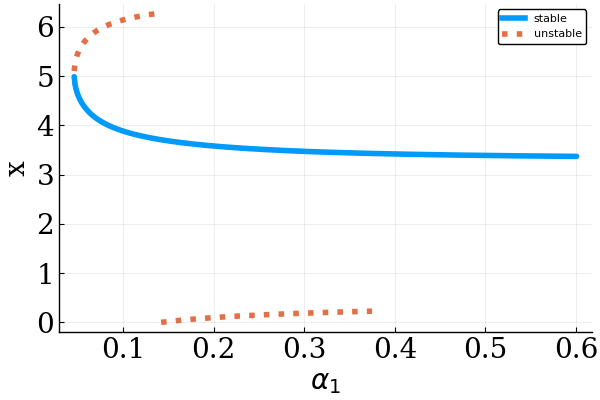

In [8]:
# Bifurcation for k1 large
x_init = []
p0 = [pi/12,2*pi/29,2*pi/29,0.35,0.04583782548261194]
fps = nlsolve((F,x) ->Map_F(F,x,p0), [4.1,4.14])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.1,4.14])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.35,0.04583782548261194]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,5,[0.04583782548261194;0.6])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()

fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),label="stable",lw = 4,color=:green)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,label="unstable",,color=:purple,
        xlabel=L"\alpha_1",ylabel="x",lw = 4,axis = (font(20, "serif")))
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_k1large_0419.png")

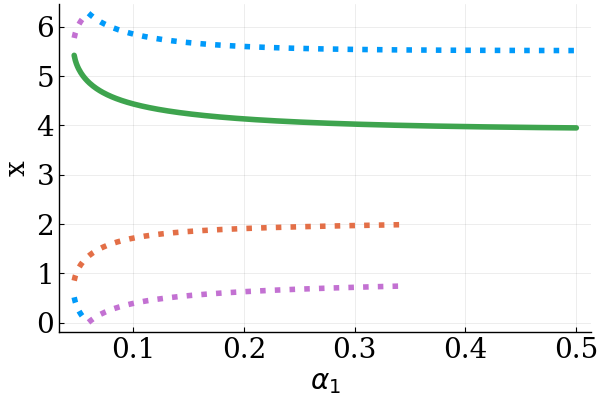

In [9]:
# For k1 normal
p0 = [pi/12,2*pi/29,2*pi/29,0.12,0.04638782548261194]

x_init = []
fps = nlsolve((F,x) ->Map_F(F,x,p0), [0.51,4.14])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.51,5.14])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.42,4.39])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.77,4.68])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.12,0.04638782548261194]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,5,[0.04638782548261194;0.5])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[3]),mod.(first.(fps_curve[3]),2*pi),lw = 4)
plot!(fig,last.(fps_curve[4][1:296]),mod.(first.(fps_curve[4][1:296]),2*pi),linestyle = :dot,lw = 4,xlabel=L"\alpha_1",ylabel="x",
        axis = (font(20, "serif")),legend = false)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_k1normal_0422.png")

In [77]:
# save("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\bifur_data0509.jld","fps_curve",fps_curve)
varinfo()    # Nice function!
# length(fps_curve[4])
# mod.(fps_curve[1][55],2*pi)
fps_curve[3][55]

3-element Array{Float64,1}:
 4.432073114226563  
 3.5735670267958013 
 0.10038782548261198

In [79]:
# plot(last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,lw = 4)
# temp = ones(length(fps_curve[2]),3)
# for i = 1: length(fps_curve[2])
#     temp[i,:] = fps_curve[2][i]
# end
# temp
# plot(mod.(temp[:,1],2*pi),mod.(temp[:,2],2*pi),xlims=(0,2*pi),ylims=(0,2*pi))

candi_curve = fps_curve[3]

p0 = [pi/12,2*pi/29,2*pi/29,0.12,0.04638782548261194]
p0[end] = candi_curve[end][3]
for i = 1:length(candi_curve)
    p0 = [pi/12,2*pi/29,2*pi/29,0.12,0.04638782548261194]
    p0[end] = candi_curve[i][3]
    if ~isnan(candi_curve[i][1])
        goal = find_evalue(candi_curve[i][1],candi_curve[i][2],p0)
        println(goal)
    end
end

Any[[0.39760703868558556, 0.8290123093103642]]
Any[[0.3975592458155976, 0.7436205651510218]]
Any[[0.3975038739424818, 0.6865404210488336]]
Any[[0.3974483228971607, 0.6421152651843884]]
Any[[0.3973784643454735, 0.6052530744932539]]
Any[[0.3973067169440857, 0.5735301026141438]]
Any[[0.39720592927294396, 0.5456053425858571]]
Any[[0.3970715759873834, 0.5206270337100981]]
Any[[0.3968920945491024, 0.4980308852525465]]
Any[[0.3966428956130363, 0.47742591917331884]]
Any[[0.3963295232004777, 0.45850344219253764]]
Any[[0.39566535707877903, 0.4413078454296385]]
Any[[0.39461342101518254, 0.4257044452239683]]
Any[[0.3916063100896881, 0.41310345986381636]]
Any[[0.38491726063355935, 0.40511888261157264]]
Any[[0.37449424483342814, 0.40170682489821313]]
Any[[0.36279014305178175, 0.40032605882218836]]
Any[[0.3509017803884174, 0.39980196997803746]]
Any[[0.3395950605923902, 0.39932977385320767]]
Any[[0.328591252226475, 0.39911631485170906]]
Any[[0.31804946566948605, 0.3989578050210868]]
Any[[0.30799914933

Any[[0.005494554001136194, 0.3979886632077081]]
Any[[0.005370012581360127, 0.3979786605449424]]
Any[[0.005235117425353566, 0.3979828765907494]]
Any[[0.005108781999460563, 0.3979837840641737]]
Any[[0.004980829871887724, 0.39798184262739744]]
Any[[0.004859351714747558, 0.397981901231015]]
Any[[0.0047433614971880735, 0.3979785256690916]]
Any[[0.004628450238717757, 0.3979792420748769]]
Any[[0.004507516058115061, 0.3979841443407365]]
Any[[0.004403473579300498, 0.39797907063324234]]
Any[[0.004294373635689613, 0.39797811151276863]]
Any[[0.0041935202617123905, 0.3979711888391039]]
Any[[0.004085420420175786, 0.3979789452883785]]
Any[[0.003991744812416216, 0.39797071852515226]]
Any[[0.0038918701091879386, 0.39797724514356303]]
Any[[0.003794123188570298, 0.3979783206199976]]
Any[[0.003696351552224454, 0.39797617884013625]]
Any[[0.0036003193502703833, 0.397987845617222]]
Any[[0.003520533984775441, 0.39798056346152416]]
Any[[0.0034317055095185837, 0.3979806292080583]]
Any[[0.003349343035246137, 0.3

Any[[5.809694289977702e-5, 0.39796481752443325]]
Any[[5.7371301129633887e-5, 0.39795624026997234]]
Any[[5.390447856573437e-5, 0.3979581741250055]]
Any[[5.202160594091742e-5, 0.3979601159424793]]
Any[[5.265748534486522e-5, 0.3979560010397837]]
Any[[4.837695116142061e-5, 0.3979628746730359]]
Any[[4.832603945043989e-5, 0.3979549807897029]]
Any[[4.477982865886375e-5, 0.3979635545433209]]
Any[[4.523487807096653e-5, 0.39795517486762033]]
Any[[4.1687070065672335e-5, 0.39796103641948877]]
Any[[4.3408274637399616e-5, 0.39795234358098025]]
Any[[3.801365455763546e-5, 0.3979624671667235]]
Any[[3.740830005996825e-5, 0.39795965960682567]]
Any[[3.528732537185376e-5, 0.3979641675112787]]
Any[[3.9670466608189917e-5, 0.39795376544601646]]
Any[[3.426030361366843e-5, 0.39795207276625266]]
Any[[3.360611867125017e-5, 0.3979610827650137]]
Any[[3.330441148915661e-5, 0.397957533485111]]
Any[[2.8702879177945964e-5, 0.39796169793416375]]
Any[[3.05805119112032e-5, 0.3979540840455158]]
Any[[2.822318410593272e-5, 0

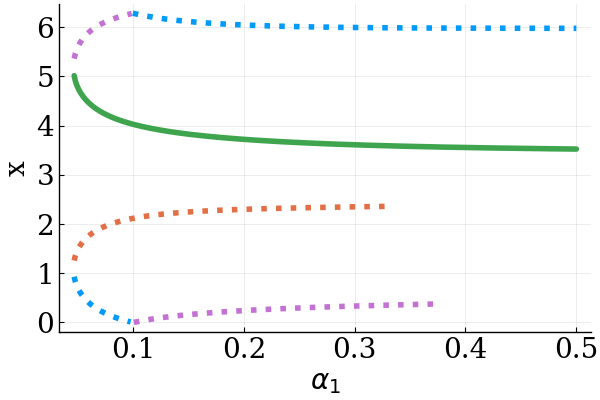

In [106]:
# k1 normal No.2

p0 = [pi/12,2*pi/29,2*pi/29,0.22,0.04638782548261194]

x_init = []
fps = nlsolve((F,x) ->Map_F(F,x,p0), [0.91,4.14])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.51,5.14])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.,4.4])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.42,4.39])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.22,0.04638782548261194]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,5,[0.04638782548261194;0.5])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[3]),mod.(first.(fps_curve[3]),2*pi),lw = 4)
plot!(fig,last.(fps_curve[4]),mod.(first.(fps_curve[4]),2*pi),linestyle = :dot,lw = 4,xlabel=L"\alpha_1",ylabel="x",
        axis = (font(20, "serif")),legend = false)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_k1normal_0420.png")

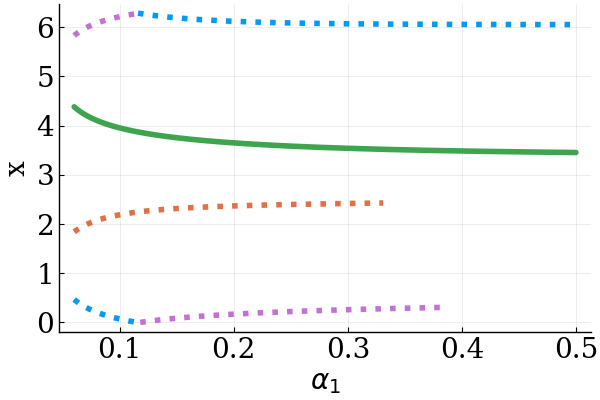

In [97]:
# k1 normal No.3

p0 = [pi/12,2*pi/29,2*pi/29,0.27,0.06]
x_init = []
fps = nlsolve((F,x) ->Map_F(F,x,p0), [0.46,3.84])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.81,5.24])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [4.94,4.44])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.28,4.72])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.27,0.06]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,5,[0.06;0.5])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[3]),mod.(first.(fps_curve[3]),2*pi),lw = 4)
plot!(fig,last.(fps_curve[4]),mod.(first.(fps_curve[4]),2*pi),linestyle = :dot,lw = 4,xlabel=L"\alpha_1",ylabel="x",
        axis = (font(20, "serif")),legend = false)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_k1normal_0420.png")

## For parameter $\alpha$

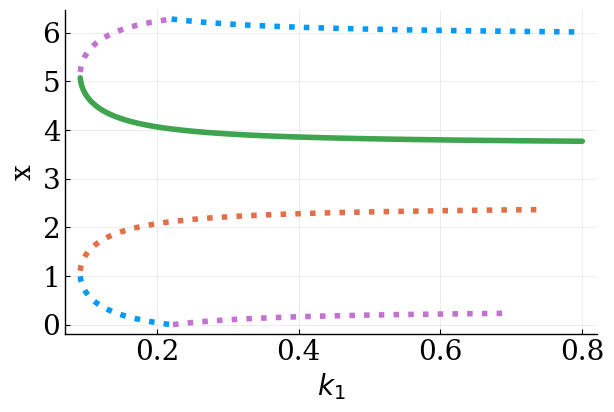

In [21]:
# alpha1 normal
x_init = []
p0 = [pi/12,2*pi/29,2*pi/29,0.09157565096522389, 0.1]
fps = nlsolve((F,x) ->Map_F(F,x,p0), [0.92,5.65])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.38,5.7])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [4.78,3.53])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.49,3.45])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.09157565096522389, 0.1]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,4,[0.09157565096522389;0.8])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[2][1:599]),mod.(first.(fps_curve[2][1:599]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[3]),mod.(first.(fps_curve[3]),2*pi),lw = 4)
plot!(fig,last.(fps_curve[4]),mod.(first.(fps_curve[4]),2*pi),linestyle = :dot,lw = 4,xlabel=L"k_1",ylabel="x",
        axis = (font(20, "serif")),legend = false)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_alpha1normal_0422.png")

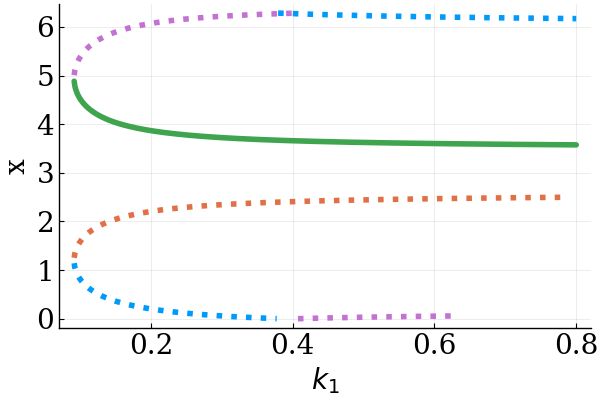

In [28]:
# alpha1 normal No.2
x_init = []
p0 = [pi/12,2*pi/29,2*pi/29,0.09157565096522389, 0.15]
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.38,5.7])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.25,5.84])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [4.78,3.53])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.49,3.45])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.09157565096522389, 0.15]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,4,[0.09157565096522389;0.8])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[3]),mod.(first.(fps_curve[3]),2*pi),lw = 4)
plot!(fig,last.(fps_curve[4]),mod.(first.(fps_curve[4]),2*pi),linestyle = :dot,lw = 4,xlabel=L"k_1",ylabel="x",
        axis = (font(20, "serif")),legend = false)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_alpha1normal_0422.png")

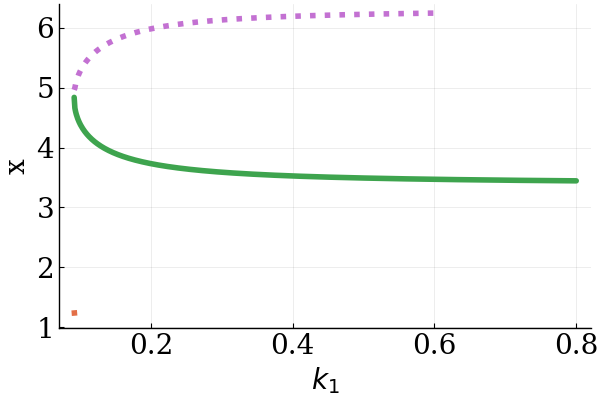

In [51]:
# α1 normal No.3
x_init = []
p0 = [pi/12,2*pi/29,2*pi/29,0.09157565096522389, 0.17]
fps = nlsolve((F,x) ->Map_F(F,x,p0), [0.8,5.85])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.88,6.])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [4.78,3.53])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.49,3.45])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.09157565096522389, 0.22]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,4,[0.09157565096522389;0.8])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> abs(x)>2, diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,lw = 4)
plot!(fig,last.(fps_curve[3]),mod.(first.(fps_curve[3]),2*pi),lw = 4)
plot!(fig,last.(fps_curve[4]),mod.(first.(fps_curve[4]),2*pi),linestyle = :dot,lw = 4,xlabel=L"k_1",ylabel="x",
        axis = (font(20, "serif")),legend = false)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_alpha1normal_0422.png")

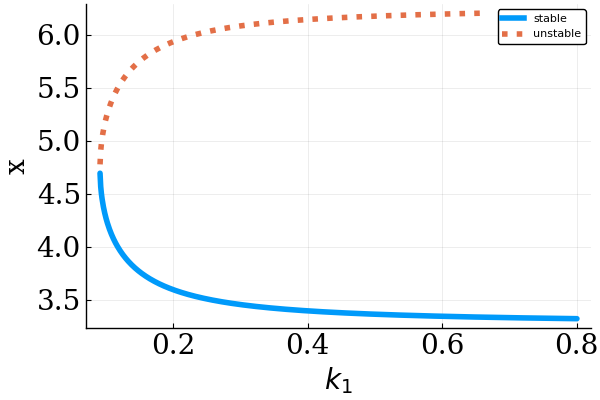

In [14]:
# alpha1 large bifurcation curve
x_init = []
p0 = [pi/12,2*pi/29,2*pi/29,0.09147565096522389,0.4]
fps = nlsolve((F,x) ->Map_F(F,x,p0), [1.3,3.14])
push!(x_init,fps.zero)
fps = nlsolve((F,x) ->Map_F(F,x,p0), [5.3,3.14])
push!(x_init,fps.zero)

fps_curve = []
for i = 1:length(x_init)
    p0 = [pi/12,2*pi/29,2*pi/29,0.09147565096522389,0.4]    # Need re-assign p0 value
    curve = fps_continuation(Map_F,x_init[i],p0,4,[0.09147565096522389;0.8])
    xx = mod.(first.(curve),2*pi)
    discon = findall(x -> x>2,diff(xx,dims=1))
    if isempty(discon) == false
        curve[discon][1] = NaN
    end
    push!(fps_curve,curve)
end

using LaTeXStrings
pyplot()

# fig = plot()
# for i = 1:length(fps_curve)
# end
fig = plot(last.(fps_curve[1]),mod.(first.(fps_curve[1]),2*pi),label="stable",lw = 4)
plot!(fig,last.(fps_curve[2]),mod.(first.(fps_curve[2]),2*pi),linestyle = :dot,label="unstable",xlabel=L"k_1",ylabel="x",
        lw = 4,axis = (font(20, "serif")))
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_alpha1large_0419.png")

## Try Multi-Dimensional Bisection Method (MDBM package)

In [95]:
using MDBM

function Map_entrain(x,y,p0)
    xreturn = Entrainment_map(x,y,p0)
    F1 = xreturn[1] - x - (2*π)
    F2 = xreturn[2] - y - (2*π)
#     F1 = xreturn[1] % (2*π) - x
#     F2 = xreturn[2] % (2*π) - y
    return [F1,F2]
end

Map_entrain (generic function with 1 method)

In [96]:
using MDBM

function Map_entrain!(x,y,p0)
    xreturn = Entrainment_map(x,y,p0)
    F1 = xreturn[3] - 24
    F2 = xreturn[2] - y - (2*π)
#     F1 = xreturn[1] % (2*π) - x
#     F2 = xreturn[2] % (2*π) - y
    return [F1,F2]
end

Map_entrain! (generic function with 1 method)

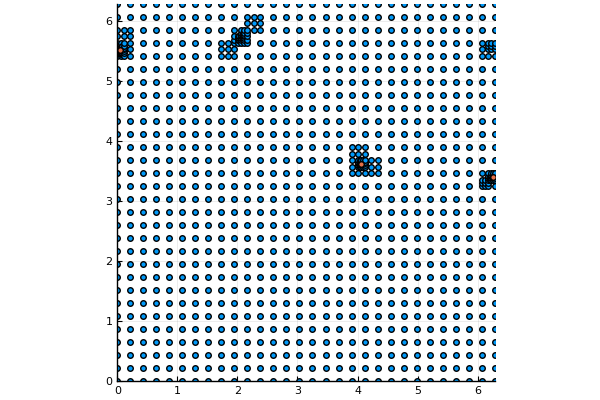

In [97]:
p0 = [pi/12,2*pi/29,2*pi/29,0.2, 0.1]  # α1 near 0.045725, saddle node.
                                                      # [0.09177565096522389,0.046]
x_range = range(-0*π,stop=2*π,length=30); y_range = range(-0*π,stop=2*π,length=30)

# x_range = range(6.07,stop=6.28,length=10); y_range = range(3.04,stop=3.24,length=10)

Entrainmap_mdbm = MDBM_Problem((x,y)->Map_entrain!(x,y,p0),[x_range,y_range])

MDBM.solve!(Entrainmap_mdbm,3)
a_eval,b_eval = getevaluatedpoints(Entrainmap_mdbm)
a_sol,b_sol = getinterpolatedsolution(Entrainmap_mdbm)

# Deal with found zeros, delete zeros where the norm is large, and where duplicated.
xynorm = map((x,y)->norm(Map_entrain(x,y,p0)),a_sol,b_sol)

small_norm = findall(x -> x<5e-2,xynorm)
a_sol_new,b_sol_new = a_sol[small_norm],b_sol[small_norm]

small_diff = findall(x -> x<0.01,diff(a_sol_new))

a_sol_fin = deleteat!(a_sol_new,small_diff)
b_sol_fin = deleteat!(b_sol_new,small_diff)

# println("hello")
scatter(a_eval,b_eval)
scatter!(a_sol_fin,b_sol_fin,xlims = (-0*π,2*pi), ylims = (-0*π,2*pi),legend=false,aspect_ratio=:equal)

In [61]:
# scatter(a_sol,b_sol,xlims = (0,2*pi), ylims = (0,2*pi))
(2*pi/24-2*pi/29)

0.04513782548261194

In [98]:
a_sol_fin,b_sol_fin
# a_sol,b_sol
# a_sol
# mod.(a_sol,2*pi)

([0.037302338071148244, 4.065750146211566, 6.249981266213831], [5.509467630058895, 3.6141770203123316, 3.404023367425273])

In [82]:
norm(Map_entrain(6.18586166139971,3.143017657932551,p0))
# map((α1)->find_all_zeros(0.06,α1),α1_range)

0.0001401885124445692

## Calculate eigenvalue near bifurcation points

In [5]:
function find_evalue(a_sol_fin,b_sol_fin,p0)
    ds = 0.001
    evalues = []
    for i = 1:length(a_sol_fin)
        xs = a_sol_fin[i]
        ys = b_sol_fin[i]
        dpidx = (Entrainment_map(xs+ds,ys,p0)-Entrainment_map(xs,ys,p0))/ds
        dpidy = (Entrainment_map(xs,ys+ds,p0)-Entrainment_map(xs,ys,p0))/ds
        Jac = [dpidx[1:2] dpidy[1:2]]
        push!(evalues,eigvals(Jac))
#         println(eigvals(Jac))
    end
    return evalues
end

find_evalue (generic function with 1 method)

In [ ]:
find_evalue(a_sol_fin,b_sol_fin,p0)

In [48]:
# @everywhere begin
function find_all_zeros(k1,α1)        
#     p0 = [pi/12,2*pi/29,2*pi/29,k1,α1]
    p0 = [pi/12,2*pi/26,2*pi/26,k1,α1]
    x_range = range(0,stop=2*π,length=10)
    y_range = range(0,stop=2*π,length=10)

    Entrainmap_mdbm = MDBM_Problem((x,y)->Map_entrain!(x,y,p0),[x_range,y_range])
    MDBM.solve!(Entrainmap_mdbm,3)
#     a_eval,b_eval = getevaluatedpoints(Entrainmap_mdbm)
    a_sol,b_sol = getinterpolatedsolution(Entrainmap_mdbm)

    # Deal with found zeros, delete zeros where the norm is large, and where duplicated.
    xynorm = map((x,y)->norm(Map_entrain(x,y,p0)),a_sol,b_sol)

    small_norm = findall(x -> x<4e-2,xynorm)
    a_sol_new,b_sol_new = a_sol[small_norm],b_sol[small_norm]

    small_diff = findall(x -> x<0.01,diff(a_sol_new))

    a_sol_fin = deleteat!(a_sol_new,small_diff)
    b_sol_fin = deleteat!(b_sol_new,small_diff)
    
#     println([k1,α1])
    
    return [[k1,α1],a_sol_fin,b_sol_fin,length(a_sol_fin)]
#     return [[k1,α1],a_sol,b_sol,length(a_sol_fin)]
end
# end

find_all_zeros (generic function with 1 method)

In [ ]:
α1_range = range(0.01,stop=0.2,length=300)
# α1_range = vcat(collect(0.04:0.005:0.049),α1_range)
fps = map((α1)->find_all_zeros(0.5,α1),α1_range);

In [12]:
fig = scatter()
for i = 1:length(fps)
    for j = 1:length(fps[i][2])
    scatter!(fig,[α1_range[i]],[fps[i][2][j]],legend=false,color=:black,xlabel="\\alpha_1",ylabel="x")
    end
end
fig
savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_k1large_0414.png")
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_k1normal_0414.png")

In [ ]:
k1_range = range(0.04,stop=0.35,length=400)
# α1_range = vcat(collect(0.04:0.005:0.049),α1_range)
fps = map((k1)->find_all_zeros(k1,0.4),k1_range);

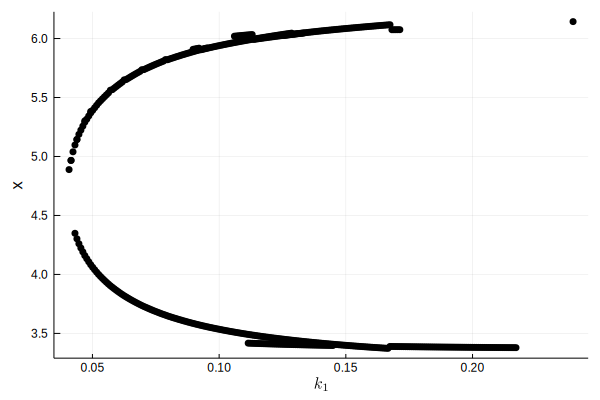

In [17]:
using LaTeXStrings

fig = scatter()
for i = 1:length(fps)
    for j = 1:length(fps[i][2])
    scatter!(fig,[k1_range[i]],[fps[i][2][j]],legend=false,color=:black,xlabel=L"k_1",ylabel="x")
    end
end
fig

# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_α1large_0414.png")
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\bifurcation_α1normal_0414.png")

In [30]:
A=[0.2 0.1 -0.3;
0.1 -0.2 0.1;
-0.3 0.1 0.2]
eigvecs(A)

3×3 Array{Float64,2}:
 -0.408248  0.57735  -0.707107   
  0.816497  0.57735  -2.22045e-16
 -0.408248  0.57735   0.707107   

## For Arnold tongue

In [ ]:
# k1_range = range(0.01,stop=0.4,length=100)
# α1_range = range(0.01,stop=0.4,length=200)
k1_range = range(0.04,stop=0.3,length=200)
α1_range = range(0.01,stop=0.2,length=100)
fpsall = []

for k1 in k1_range
    fps = map((α1)->find_all_zeros(k1,α1),α1_range)
#     filename = @sprintf "C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\fps_k1_%f.jld" k1
#     save(filename,"fps",fps)   
    push!(fpsall,fps)
    println(k1)
end

In [ ]:
fpsall

In [167]:
using Printf
filename = @sprintf "C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\ArnoldTongue_0414.jld"
#k1_%.2f_alpha1_%.2f.jld" k1_range[end] α1_range[end]
save(filename,"fpsall",fpsall)

In [ ]:
# fpsall = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\fps_k1_0.38_alpha1_0.40.jld","fpsall")
# fpsall = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\ArnoldTongue_0414.jld","fpsall")
pars = []
fps_n = []
for i = 1:length(fpsall)
    pars = [pars;first.(fpsall[i])]
    fps_n = [fps_n;last.(fpsall[i])]   
#     push!(fps_n,last.(fpsall[i]))
end

using LaTeXStrings
# gr()
fig = plot(last.(pars),first.(pars),fps_n,xlabel = L"\alpha_1", ylabel = L"k_1", seriestype = :surface,c=:lighttest,camera=(0,90))
# fig = plot(last.(pars),first.(pars),fps_n,seriestype = :surface,c=:lightrainbow,camera=(0,90),
#             size=(800,600))#,aspect_ratio=:equal)
# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\ArnoldTongue2020418.png")

## For alpha bifurcation

In [ ]:
α1_range = range(0.01,stop=0.4,length=1000)
k1 = 0.1
fps = map((α1)->find_all_zeros(k1,α1),α1_range)
fps_evalues = []
for i = 1:length(fps)
    fps_x = fps[i][2]
    fps_y = fps[i][3]
    evalues = find_evalue(fps_x,fps_y,p0)
    push!(fps_evalues,evalues)
end

In [ ]:
using Printf
filename = @sprintf "C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\fps_k1_%.2f_alpha1range.jld" 0.1
save(filename,"fps",fps,"fps_evalues",fps_evalues)

## Make some bifurcation plots
*fixed $k_1$*
**change $\alpha_1$**

- Plot 1: the location of fixed points
- Plot 2: the location of their eigenvalues

In [ ]:
# fpsall_sp = fpsall[25]
# using Printf
# filename = @sprintf "C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\fps_k1_%.2f_alpha1range.jld" 0.1
# fps = load(filename,"fps")
# fps_evalues = load(filename,"fps_evalues")

fpsall_sp = fps

pars = last.(first.(fpsall_sp))   
fps_x = [x[2] for x in fpsall_sp]  
fps_y = [x[3] for x in fpsall_sp]
@manipulate for α_value in pars
    i = findall(x->x==α_value,pars)
    scatter(fps_x[i],fps_y[i],xlims = (0,2*pi), ylims = (0,2*pi), legend=false)          
end

In [ ]:
fps_evalues[93]

In [ ]:
# xtheta = range(0,stop=2*pi,length=100)

@manipulate for i = 1:length(fps_evalues)
#     plot(cos.(xtheta),sin.(xtheta),aspect_ratio=:equal)
    Plots.vline([1])
    Plots.hline!([1])
    scatter!(abs.(first.(fps_evalues[i])),abs.(last.(fps_evalues[i])),legend=false)
end

## Return time & first iterate calculation (two parameters)

In [ ]:
using LinearAlgebra
# Calculate the first iterate.

#p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.08]
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
#Pi_1st = Array{Array{Float64,1},2}(undef,length(x),length(y))
Pi_1st_set = Array{Any}(undef,0)

k1range = vcat(collect(0.3:0.1:2), collect(2:1:20))
α1range = vcat(collect(0.04:0.005:0.05),collect(0.05:0.1:0.35),collect(0.35:1:10.35))

# Two parameter bifurcation
for k1 in k1range, α1 in α1range    
    # Comment: need to redefine this variable befor assign to cell array
    Pi_1st = Array{Array{Float64,1},2}(undef,length(x),length(y))   
    # Comment: need to redefine this variable befor assign to cell array
    
    p0 = [pi/12,2*pi/29,2*pi/29,k1,α1]
    
    for i = 1:length(x), j = 1:length(y)
        xs = x[i]
        ys = y[j]       
        Pi_1st[i,j] = Entrainment_map(xs,ys,p0)
    end
    
    #print(p0)
    push!(Pi_1st_set,Pi_1st)
    
end
save("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set0213.jld", "Pi_1st_set",Pi_1st_set)

In [68]:
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
# length(Pi_1st_set)
(2*pi/24-2*pi/29)

0.04513782548261194

In [ ]:
# Pi_1st_set = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set0213.jld","Pi_1st_set")

X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))

fig_1st_iter = Array{Plots.Plot{Plots.GRBackend},1}(undef,666)  # Define an array of plot variables.

for i = 1:length(Pi_1st_set)
    Pi_1st = Pi_1st_set[i]
    Pi_1st_1 = [x[1] for x in Pi_1st]
    Pi_1st_2 = [x[2] for x in Pi_1st]
    #Pi_1st_iter = [sin.(x[1:2]) for x in Pi_1st]
    #Pi_idmat = [sin.([i,j]) for i in x, j in y]

    q1 = contour(x,y,Pi_1st_1' - X.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:blue,aspect_ratio=:equal, 
            xlims = (0,2*pi), ylims = (0,2*pi),colorbar = :none)
    #q1 = contour(x,y,Pi_1st_1' - sin.(X),xlabel="x",ylabel="y",c=:lightrainbow,fill=true)
    q2 = contour!(q1, x,y,Pi_1st_2' - Y.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:red)
    fig_1st_iter[i] = q2
end

In [ ]:
@manipulate for i=1:length(Pi_1st_set)#49   
                plot(fig_1st_iter[i])
    end

## One parameter (change alpha1)

In [88]:
# Finite difference.
function grad_ρ(xs,ys,p0)
    ds = 0.001
    dpdx = (Return_ρ(xs+ds,ys,p0)-Return_ρ(xs,ys,p0))/ds
    dpdy = (Return_ρ(xs,ys+ds,p0)-Return_ρ(xs,ys,p0))/ds
    return [dpdx;dpdy]
end

grad_ρ (generic function with 1 method)

In [22]:
# One parameter bifurcation

x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
Pi_1st_set_alpha1 = Array{Any}(undef,0)

# Two parameter bifurcation
k1 = 0.1 #0.09027565096522389

α1_range =0.5 #range(0.05,stop=0.4,length=30)#vcat(collect(0.04:0.005:0.05),collect(0.15:0.1:0.5))
#α1_range = vcat(collect(0:0.01:0.04), collect(0.045:0.0001:0.046), collect(0.05:0.01:0.1), collect(0.1:0.1:0.4))
for α1 in α1_range    

    # Comment: need to redefine this variable befor assign to cell array
    Pi_1st = Array{Array{Float64,1},2}(undef,length(x),length(y))   
    # Comment: need to redefine this variable befor assign to cell array
    p0 = [pi/12,2*pi/29,2*pi/29,k1,α1]
    
    for i = 1:length(x), j = 1:length(y)
        xs = x[i]
        ys = y[j]
        Pi_1st[i,j] = Entrainment_map(xs,ys,p0)
    end
    
    print(p0)
    push!(Pi_1st_set_alpha1,Pi_1st)    
end

#save("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set_alpha1.jld", "Pi_1st_set_alpha1",Pi_1st_set_alpha1)

[0.2617993877991494, 0.21666156231653746, 0.21666156231653746, 0.1, 0.5]

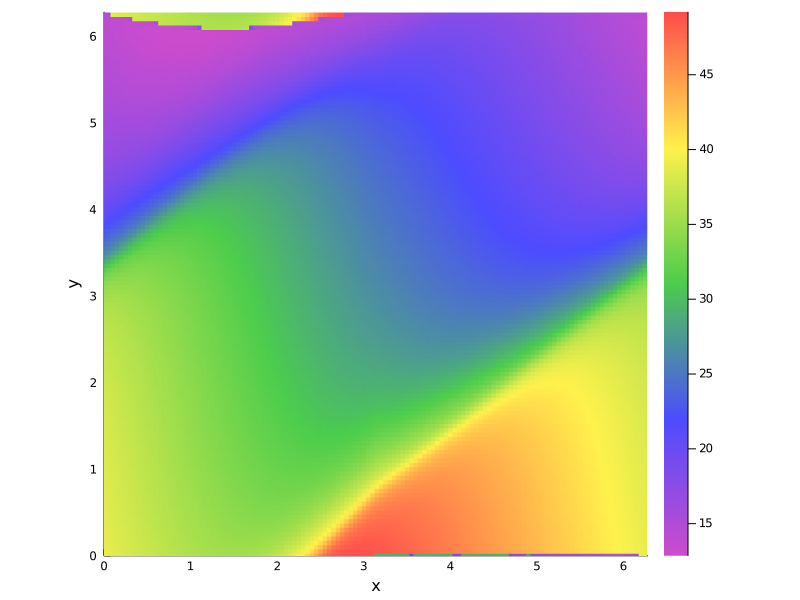

In [23]:
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))

# fig_1st_iter_alpha1 = Array{Plots.Plot{Plots.GRBackend},1}(undef,80)  # Define an array of plot variables.

# @manipulate for i = 1:length(Pi_1st_set_alpha1)
#     Pi_1st = Pi_1st_set_alpha1[i]
#     Pi_1st_3 = [x[3] for x in Pi_1st]
#     h1 = heatmap(x,y,Pi_1st_3',xlabel="x",ylabel="y",aspect_ratio=:equal,c=cgrad([:blue, :white,:red, :yellow]),
#     xlims = (0,2*pi), ylims = (0,2*pi))
# end

# anim = @animate for i = 1:length(Pi_1st_set_alpha1)
#     Pi_1st = Pi_1st_set_alpha1[i]
#     Pi_1st_3 = [x[3] for x in Pi_1st]
#     h1 = heatmap(x,y,Pi_1st_3',xlabel="x",ylabel="y",aspect_ratio=:equal,c=cgrad([:blue, :white,:red, :yellow]),
#     xlims = (0,2*pi), ylims = (0,2*pi))
# end
# gif(anim,"C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\anim_returntime_0512.gif", fps = 5)

Pi_1st_3 = [x[3] for x in Pi_1st_set_alpha1[1]]
# h1 = heatmap(x,y,Pi_1st_3',xlabel="x",ylabel="y",aspect_ratio=:equal,c=cgrad([:blue, :white,:red, :yellow]),
#     xlims = (0,2*pi), ylims = (0,2*pi))
h1 = heatmap(x,y,Pi_1st_3',xlabel="x",ylabel="y",aspect_ratio=:equal,c=:lightrainbow,
    xlims = (0,2*pi), ylims = (0,2*pi),size=(800,600))
# savefig(h1, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\returntime_0530.png")

In [81]:
## Logic index is a very good tool dealing with data!!!!!!!

zind = findall(abs.(Pi_1st_1'-X .- 2*pi).<0.03)
fig = plot(X[zind],Y[zind],xlims = (0,2*pi), ylims = (0,2*pi),lw=2,c=:blue,legend=:false,
        xlabel="x",ylabel="y",aspect_ratio=:equal)

zind = findall(abs.(Pi_1st_2'-Y .- 2*pi).<0.008)
zind_a = findall(Y[zind].>1)
plot!(fig,X[zind[zind_a]],Y[zind[zind_a]],xlims = (0,2*pi), ylims = (0,2*pi),lw=2,c=:red)

# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\nullcline_bothlarge.png")

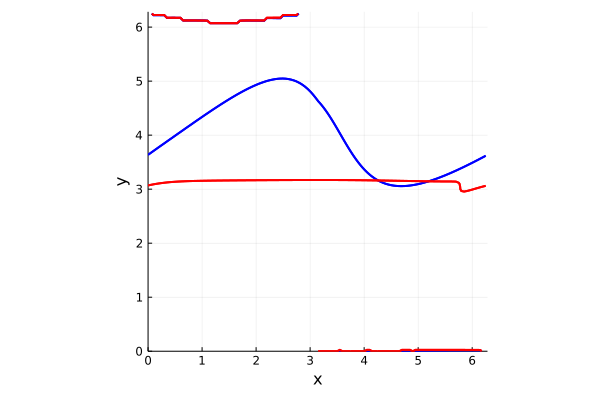

In [24]:
# For special parameter.
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))

# fig_1st_iter_alpha1 = Array{Plots.Plot{Plots.GRBackend},1}(undef,80)  # Define an array of plot variables.
gr()
    Pi_1st = Pi_1st_set_alpha1[1]
    Pi_1st_1 = [x[1] for x in Pi_1st]
    Pi_1st_2 = [x[2] for x in Pi_1st]
    #Pi_1st_iter = [sin.(x[1:2]) for x in Pi_1st]
    #Pi_idmat = [sin.([i,j]) for i in x, j in y]

    q1 = contour(x,y,Pi_1st_1' - X.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:blue,aspect_ratio=:equal, 
            xlims = (0,2*pi), ylims = (0,2*pi),colorbar = :none,lw=2)
    #q1 = contour(x,y,Pi_1st_1' - sin.(X),xlabel="x",ylabel="y",c=:lightrainbow,fill=true)
    q2 = contour!(q1, x,y,Pi_1st_2' - Y.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:red,lw=2)
# savefig(q2, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\nullcline_bothlarge.png")

In [98]:
savefig(q2, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\nullcline_bothlarge.png")

In [73]:
# Plot one parameter bifurcation
# Pi_1st_set_alpha1 = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set_alpha1.jld","Pi_1st_set_alpha1")
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))

# fig_1st_iter_alpha1 = Array{Plots.Plot{Plots.GRBackend},1}(undef,80)  # Define an array of plot variables.

for i = 1:length(Pi_1st_set_alpha1)
    Pi_1st = Pi_1st_set_alpha1[i]
    Pi_1st_1 = [x[1] for x in Pi_1st]
    Pi_1st_2 = [x[2] for x in Pi_1st]
    #Pi_1st_iter = [sin.(x[1:2]) for x in Pi_1st]
    #Pi_idmat = [sin.([i,j]) for i in x, j in y]

    q1 = contour(x,y,Pi_1st_1' - X.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:blue,aspect_ratio=:equal, 
            xlims = (0,2*pi), ylims = (0,2*pi),colorbar = :none)
    #q1 = contour(x,y,Pi_1st_1' - sin.(X),xlabel="x",ylabel="y",c=:lightrainbow,fill=true)
    q2 = contour!(q1, x,y,Pi_1st_2' - Y.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:red)
#     fig_1st_iter_alpha1[i] = q2
end

In [ ]:
anim = @animate for i=1:length(Pi_1st_set_alpha1)   
                plot(fig_1st_iter_alpha1[i])
    end
gif(anim,"C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\anim_bifur_alpha1.gif", fps = 15)

In [ ]:
@manipulate for i=1:length(Pi_1st_set_alpha1)   
                plot(fig_1st_iter_alpha1[i])
    end

## one parameter (change k_1)

In [ ]:
# One parameter bifurcation

x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
Pi_1st_set_k1 = Array{Any}(undef,0)

# Two parameter bifurcation
α1 = 0.1#0.09027565096522389

k1_range = vcat(collect(0.09027565096522389:0.01:0.15),collect(0.15:0.1:0.95))
#α1_range = vcat(collect(0:0.01:0.04), collect(0.045:0.0001:0.046), collect(0.05:0.01:0.1), collect(0.1:0.1:0.4))
for k1 in k1_range    

    # Comment: need to redefine this variable befor assign to cell array
    Pi_1st = Array{Array{Float64,1},2}(undef,length(x),length(y))   
    # Comment: need to redefine this variable befor assign to cell array
    p0 = [pi/12,2*pi/29,2*pi/29,k1,α1]
    
    for i = 1:length(x), j = 1:length(y)
        xs = x[i]
        ys = y[j]
        Pi_1st[i,j] = Entrainment_map(xs,ys,p0)
    end
    
    print(p0)
    push!(Pi_1st_set_k1,Pi_1st)    
end

save("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set_k1.jld", "Pi_1st_set_k1",Pi_1st_set_k1)

In [ ]:
# Plot one parameter bifurcation
Pi_1st_set_k1 = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set_k1.jld","Pi_1st_set_k1")
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))

fig_1st_iter_k1 = Array{Plots.Plot{Plots.GRBackend},1}(undef,80)  # Define an array of plot variables.

for i = 1:length(Pi_1st_set_k1)
    Pi_1st = Pi_1st_set_k1[i]
    Pi_1st_1 = [x[1] for x in Pi_1st]
    Pi_1st_2 = [x[2] for x in Pi_1st]
    #Pi_1st_iter = [sin.(x[1:2]) for x in Pi_1st]
    #Pi_idmat = [sin.([i,j]) for i in x, j in y]

    q1 = contour(x,y,Pi_1st_1' - X.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:blue,aspect_ratio=:equal, 
            xlims = (0,2*pi), ylims = (0,2*pi),colorbar = :none)
    #q1 = contour(x,y,Pi_1st_1' - sin.(X),xlabel="x",ylabel="y",c=:lightrainbow,fill=true)
    q2 = contour!(q1, x,y,Pi_1st_2' - Y.-2*pi,levels=[0,0],xlabel="x",ylabel="y",c=:red)
    fig_1st_iter_k1[i] = q2
end

In [ ]:
@manipulate for i=1:length(Pi_1st_set_k1)   
                plot(fig_1st_iter_k1[i])
    end

In [ ]:
anim = @animate for i=1:length(Pi_1st_set_k1)   
                plot(fig_1st_iter_k1[i])
    end
gif(anim,"C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\anim_bifur_k1.gif", fps = 15)

## Real bifurcation diagram try geometrical method to find fixed points

function findintersects(x1,y1,x2,y2)
    intersections = []
    for j = 1:(length(x2)-1)
        
        fold = (x2[j+1]-x2[j])*(y1[1]-y2[j+1]) - (y2[j+1]-y2[j])*(x1[1]-x2[j+1]);
        finded = []
        for i = 2:length(x1)
            fnew = (x2[j+1]-x2[j])*(y1[i]-y2[j+1]) - (y2[j+1]-y2[j])*(x1[i]-x2[j+1]);
            
            if (fnew*fold)<0
                system = [1                  0           x2[j+1]-x2[j];
                          0                  1           y2[j+1]-y2[j];
                          y1[i]-y1[i-1]  x1[i-1]-x1[i]    0]
                RHS = [x2[j+1], y2[j+1], y1[i]*x1[i-1]-x1[i]*y1[i-1]]
                
                int = system \ RHS
                
                if int[3]>=0 && int[3]<=1
                    push!(finded,int)
                end
            end
            fold=fnew
        end
        print(finded)
        if ~isempty(finded)
            p = sortperm(finded[3,:])
            push!(intersections,finded[1:2,p])
        end
    end
    if isempty(intersections)
        return nothing
    else
        return intersections
    end
end

# One parameter bifurcation
# extract the intersections
using Contour

#Pi_1st_set_alpha1 = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set_alpha1.jld","Pi_1st_set_alpha1")
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
num_fixed = []

for i = 1:length(Pi_1st_set_alpha1)
    Pi_1st = Pi_1st_set_alpha1[i]
    Pi_1st_1 = [x[1] for x in Pi_1st]
    Pi_1st_2 = [x[2] for x in Pi_1st]
    #Pi_1st_iter = [sin.(x[1:2]) for x in Pi_1st]
    #Pi_idmat = [sin.([i,j]) for i in x, j in y]
    c1 = Contour.contour(x,y,Pi_1st_1' - X.-2*pi,0)
    c2 = Contour.contour(x,y,Pi_1st_2' - Y.-2*pi,0)
    line1 = lines(c1)
    line2 = lines(c2)
    if length(line1)>0 && length(line2)>0
        x1,y1 = coordinates(line1[1])
        x2,y2 = coordinates(line2[1])
        xy_inter = findintersects(x1,y1,x2,y2)
        push!(num_fixed,xy_inter)
    else
        push!(num_fixed,nothing)
    end
end

using Contour # hide
x = -3:0.01:3 # hide
y = -4:0.02:5 # hide
z = [Float64((xi^2 + yi^2)) for xi in x, yi in y] # hide
#plot(args...;kwargs...) = nothing # hide
c = contours(x,y,z) # hide
cl = first(levels(c)) # hide
xs, ys = coordinates(first(lines(cl)))
#plot(xs,ys)
c = Contour.contour(x,y,z,9)
cl = lines(c)

xs,ys = coordinates(cl[1])
#plot(xs,ys)
#level(cl) # the z-value of the current isoline collection
#lines(cl) # an iterable collection of isolines

#jldopen("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\pi_f.jld", "w") do file
 #   write(file, "Pi_1st"*string(nnn+1),nn2)  # alternatively, say "@write file A"
#end
#d = load("C:\\Users\\liaog\\Documents\\Julia_codes\\datas\\Pi_1st_set.jld","Pi_1st_set")
#fig_1st_iter = Array{Plots.Plot{Plots.GRBackend},1}(undef,3)
#count
#Pi_1st_set
Pi_1st_set

Pi_1st = Pi_1st_set_alpha1[24]
Pi_1st_1 = [x[1] for x in Pi_1st]
Pi_1st_2 = [x[2] for x in Pi_1st]
#Pi_1st_iter = [sin.(x[1:2]) for x in Pi_1st]
#Pi_idmat = [sin.([i,j]) for i in x, j in y]

q1 = plot(x,y,Pi_1st_1',xlabel="x",ylabel="y",st=:surface,aspect_ratio=:equal, 
        xlims = (0,2*pi), ylims = (0,2*pi),colorbar = :none)
#q1 = contour(x,y,Pi_1st_1' - sin.(X),xlabel="x",ylabel="y",c=:lightrainbow,fill=true)
q2 = plot(x,y,Pi_1st_2',st=:surface)
plot(q1,q2)

# last.() access the last element of data
Pi_1st_iter = [x[1:2] .% (2*pi) for x in Pi_1st]
Pi_idmat = [[i,j] for i in x, j in y]
Pi_diff = Pi_1st_iter - Pi_idmat
Pi_norm = [norm(x,2) for x in Pi_diff]

f0 = plot(x,y,Pi_norm',xlabel="x",ylabel="y", st=:heatmap,c=:lightrainbow,aspect_ratio=:equal,xlims=(0,2*pi),ylims=(0,2*pi))
f1 = contour(x,y,Pi_norm',xlabel="x",ylabel="y",levels=[0.01,0.01],xlims=(0,2*pi),ylims=(0,2*pi))
f2 = plot(x,y,last.(Pi_1st),aspect_ratio=:equal,c=:lightrainbow,st=:heatmap,size=(400,300),xlims=(0,2*pi),ylims=(0,2*pi))
f3 = contour(x,y,last.(Pi_1st).-24,levels=[0,0],aspect_ratio=:equal,c=:red,size=(400,300),
        colorbar=:none,xlims=(0,2*pi),ylims=(0,2*pi))
#f4 = 

fig = plot(f0,f1,f2,f3)

#savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\fig1_0123.png")

#plot(f1)

## Bifurcation curve (4 to 2)

using LinearAlgebra

#p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.08]
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
#Pi_1st = Array{Array{Float64,1},2}(undef,length(x),length(y))
B_curve = Array{Any}(undef,0)
k_c = (pi/12-2*pi/29)*2
α_c = pi/12-2*pi/29

@eval macro $(:do)(block, when::Symbol, condition)
           when ≠ :when && error("@do expected `when` got `$s`")
           quote
               let
                   $block
                   while $condition
                       $block
                   end
               end
           end |> esc
       end

# Two parameter bifurcation
for k1 = k_c:0.05:0.4
    α1 = α_c
    eps = 0.01
    @do begin
        p0 = [pi/12,2*pi/29,2*pi/29,k1,α1]
        #y1 = Entrainment_map(pi/3,3*pi/2,p0) .% (2*pi)
        y1 = [Entrainment_map(2*pi/5,ys,p0) for ys in y]
        y11 = [x[2] for x in y1]
        mean_y11 = sum(y11)/length(y11) .% (2*pi)
        #y2 = Entrainment_map(pi/2,pi/2,p0)
        α1 += 0.01
        end when (abs(mean_y11-pi)>eps) #|| (abs(y2[2]-3*pi)>eps)
    
    push!(B_curve,[k1,α1 - 0.01])    
end

#plot(B_curve)

#B_curve
plot(last.(B_curve),first.(B_curve))

p0 = [pi/12,2*pi/29,2*pi/29,20.2,0.15]
temp = Entrainment_map(4.2,1.55,p0) #.% (2*pi)

## Lagarangian descriptor

In [5]:
function Lag_descriptor(map,map_back,pars,N,ds)
# N is the number of iterations for the sum.
# ds: the mesh size of x and y
    x = 0:ds:2*pi;  y = 0:ds:2*pi;
    Tmax = length(x)
    Lag_sum = zeros(length(x),length(y))
    for i=1:Tmax,j=1:Tmax
        pt_f = [x[i]; y[j]]
        pt_b = [x[i]; y[j]]
        pt1 = map(x[i],y[j],pars)
        pt2 = map_back(x[i],y[j],pars)
        pt_fnew = pt1[1:2]
        pt_bnew = pt2[1:2]
        iternum = 0
        tr_sum = 0
        for k = 1:N
            tr_sum = tr_sum + norm(pt_fnew-pt_f)^2 + norm(pt_bnew-pt_b)^2
            pt_f = mod.(pt_fnew,2*pi)
            pt_b = mod.(pt_bnew,2*pi)
            pt1 = map(pt_f[1],pt_f[2],pars)
            pt2 = map_back(pt_b[1],pt_b[2],pars)
            pt_fnew = pt1[1:2]
            pt_bnew = pt2[1:2]
        end
        Lag_sum[i,j] = tr_sum
    end
    return Lag_sum
end

Lag_descriptor (generic function with 1 method)

In [13]:
p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.08]
ds = 0.05
x = 0:ds:2*pi;  y = 0:ds:2*pi;
L_sum = Lag_descriptor(Entrainment_map,Entrainment_map_back,p0,5,0.05);
lag1 = heatmap(x,y,L_sum',xlabel="x",ylabel="y", c=:lightrainbow,
                aspect_ratio=:equal,size=(800,600),xlims=(0,2*pi),ylims=(0,2*pi))
# dd = Entrainment_map(1,2,p0)
using MATLAB
L_sum_gr = mxcall(:gradient,1,L_sum)
lag_G = heatmap(x,y,L_sum_gr',xlabel="x",ylabel="y", c=:lightrainbow,
                aspect_ratio=:equal,xlims=(0,2*pi),ylims=(0,2*pi))

lag2 = plot(lag1,lag_G)
savefig(lag1, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\lagD_small20200715.png")

LoadError: syntax: unexpected ","

In [12]:
p0 = [pi/12,2*pi/29,2*pi/29,2,0.1]
ds = 0.05
x = 0:ds:2*pi;  y = 0:ds:2*pi;
L_sum = Lag_descriptor(Entrainment_map,Entrainment_map_back,p0,5,ds);
lag1 = heatmap(x,y,L_sum',xlabel="x",ylabel="y", c=:lightrainbow,
                aspect_ratio=:equal,xlims=(0,2*pi),ylims=(0,2*pi))
using MATLAB
L_sum_gr = mxcall(:gradient,1,L_sum)
lag_G = heatmap(x,y,L_sum_gr',xlabel="x",ylabel="y", c=:lightrainbow,
                aspect_ratio=:equal,xlims=(0,2*pi),ylims=(0,2*pi))

lag2 = plot(lag1,lag_G)
# savefig(lag1, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\lagD_large20200715.png")

## Entrain time calculation

In [ ]:
# X = Entrainment_map(2.3,0.7,p0)
(pi/12-2*pi/29)
3*pi

In [ ]:
using LinearAlgebra
p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.08]
x = 0:0.05:2*pi;  y = 0:0.05:2*pi;
Pi_time = zeros(length(x),length(y))
iter_max = 80
iternum = 0
sum = 0
for i = 1:length(x), j = 1:length(y)
    xs = x[i]
    ys = y[j]
    Xreturn = Entrainment_map(xs,ys,p0)
    while (norm((Xreturn[1:2] .% (2*pi)) - [xs,ys]) > 0.005) & (iternum < iter_max)
        sum += Xreturn[3]
        iternum += 1
        xs = Xreturn[1] .% (2*pi)
        ys = Xreturn[2] .% (2*pi)
        Xreturn = Entrainment_map(xs,ys,p0)
    end
    Pi_time[i,j] = sum
    sum = 0
    iternum = 0
end

In [ ]:
# plot(x,y,Pi_time,xlabel="x",ylabel="y",st=:surface,c=:deep,camera=(0,90))

In [ ]:
gr()
etime1 = heatmap(x,y,Pi_time',xlabel="x",ylabel="y", c=:lightrainbow,
                aspect_ratio=:equal,size=(800,600),xlims=(0,2*pi),ylims=(0,2*pi))
#savefig(etime1, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\etime008.png")

In [ ]:
com1 = contour!(etime1,x,y,PI[:,:,1]'-X.-2*pi,levels=[0,0],c=:blue,lw=2)
com2 = contour!(com1,x,y,PI[:,:,2]'-Y.-2*pi,levels=[0,0],c=:red,lw=2)

In [ ]:
# savefig(com2, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\etimewithnullcline_1.png")

In [ ]:
#? norm

In [ ]:
# A note for assigning data to cell array.
Pi_1st_set = Array{Any}(undef,0)
trye = [12123,123,12]
tree = [123,13,1]
push!(Pi_1st_set,trye)
#Pi_1st_set[1] = Pi_1st
#temp = Pi_1st
trye = Array{Any}(undef,3)
trye[1] = 1
push!(Pi_1st_set,trye)
#Pi_1st_set[2] = temp
Pi_1st_set

## 1-D map to show dependence on k

In [3]:
function Entrainment_map_1D(x,p0)
    condition(u,t,integrator) = u[2] - 3*pi
    affect!(integrator) = terminate!(integrator)
    cevent = ContinuousCallback(condition,affect!,nothing)
    u0 = [x,pi,pi]
    tspan = (0.0,60.0)
#     prob = ODEProblem(C_kuramoto,u0,tspan,p0)
    prob = ODEProblem(C_kuramoto_L,u0,tspan,p0)
    sol = solve(prob,Rosenbrock23(),callback=cevent,reltol=1e-10,abstol=1e-10)
#     return [sol[1,end],sol[2,end],sol.t[end]]
    return sol[1,end] .% (2*pi)
end

Entrainment_map_1D (generic function with 1 method)

In [4]:
p0 = [pi/12,2*pi/29,2*pi/29,0.1,0.08]
Entrainment_map_1D(5.95,p0)

4.56573905728874

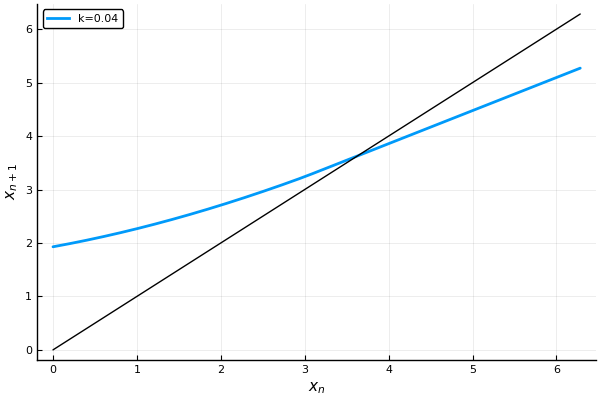

In [28]:
using LaTeXStrings
pyplot()
krange = 0.04#[0.08 0.12 0.4] #.08:0.02:0.2 #range(0.08,stop=0.5,length=10)
xspan = range(0,stop=2*pi,length=2000)
fig = plot()
for k in krange
    p0 = [pi/12,2*pi/29,2*pi/29,k,0.1]
    xnew = map((x)->Entrainment_map_1D(x,p0),xspan)
    plot!(fig,xspan,xnew,label="k="*string(k),lw=2)
end

plot!([0,2*pi],[0,2*pi],label=:false,c=:black,legend=:topleft,xlabel=L"x_n",ylabel=L"x_{n+1}")
fig

# savefig(fig, "C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\Kura_1D_20200703.png")

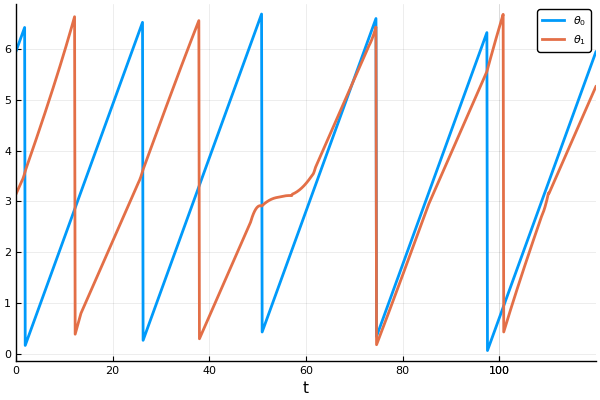

In [14]:
condition(u,t,integrator) = u[2] - 3*pi
function affect!(integrator)
    integrator.u[2] = pi
    push!(tt, integrator.t)    # save the event time
end
tt = []
cevent = ContinuousCallback(condition,affect!,nothing)
u0 = [5.95,pi,pi]
tspan = (0.0,120.0)

p0 = [pi/12,2*pi/29,2*pi/29,0.2,0.1]  # w,w1,w2,k1,α1
prob = ODEProblem(C_kuramoto,u0,tspan,p0)
sol_entrain = solve(prob,Rosenbrock23(),callback=cevent)

sol_entrain[1,:] = sol_entrain[1,:] .% (2*pi)
sol_entrain[2,:] = sol_entrain[2,:] .% (2*pi);

using LaTeXStrings
pyplot()
# tcourse1 = plot(sol_unentrain,label=[L"θ_0" L"θ_1" L"θ_2"], lw=2, xticks= 0:24:240, title = "Non-entrainment", legend = :outertopright)
# tcourse2 = plot(sol_entrain,label=[L"θ_0" L"θ_1" L"θ_2"], lw=2, xticks= 0:24:240, title = "Entrainment", legend = :outertopright)
# tcourse = plot(tcourse1,tcourse2,layout=(2,1))
plot(sol_entrain,vars=[1,2],label=[L"θ_0" L"θ_1"],lw=2)

In [56]:
# plot(sol_entrain,vars=[1,2],linestyle=:dot)
# plot(sol_entrain,vars=[1,2],label=[L"θ_0" L"θ_1"],lw=2)
tt

4-element Array{Any,1}:
  32.60437896857986
  56.54698787252372
  80.54951925819523
 104.550686058944  